# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/bank_transactions_data_2.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
row, col = df.shape
print(f"Jumlah kolom: {col}")
print(f"Jumlah baris: {row}")

Jumlah kolom: 16
Jumlah baris: 2512


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [8]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


<Figure size 1000x600 with 0 Axes>

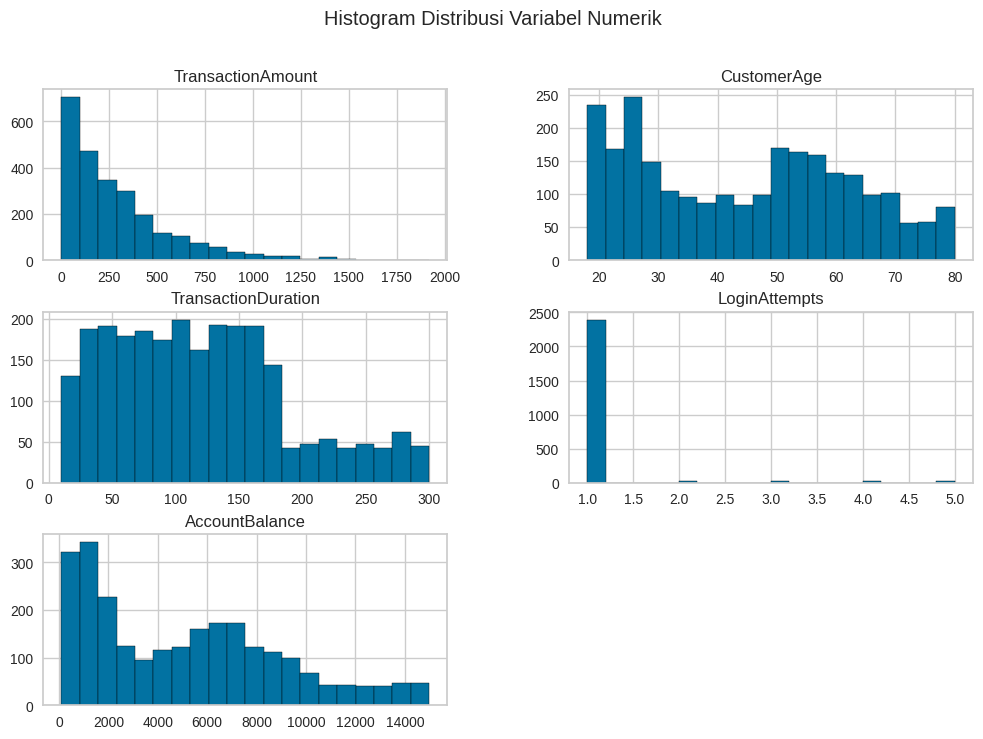

In [9]:
plt.figure(figsize=(10, 6))
df.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

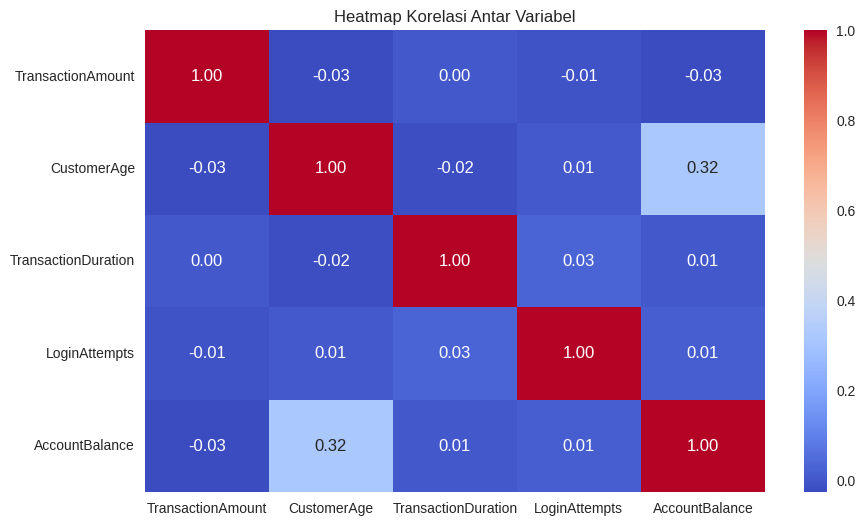

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
df_cleaned = df.copy()

In [12]:
features = ['TransactionAmount', 'TransactionType', 'Channel', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df_cleaned = df_cleaned[features]

In [13]:
df_cleaned.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Channel,0
TransactionDuration,0
AccountBalance,0
CustomerAge,0


In [14]:
df_cleaned.duplicated().sum()

np.int64(0)

TransactionAmount column: 113 outlier
TransactionDuration column: 0 outlier
AccountBalance column: 0 outlier
CustomerAge column: 0 outlier


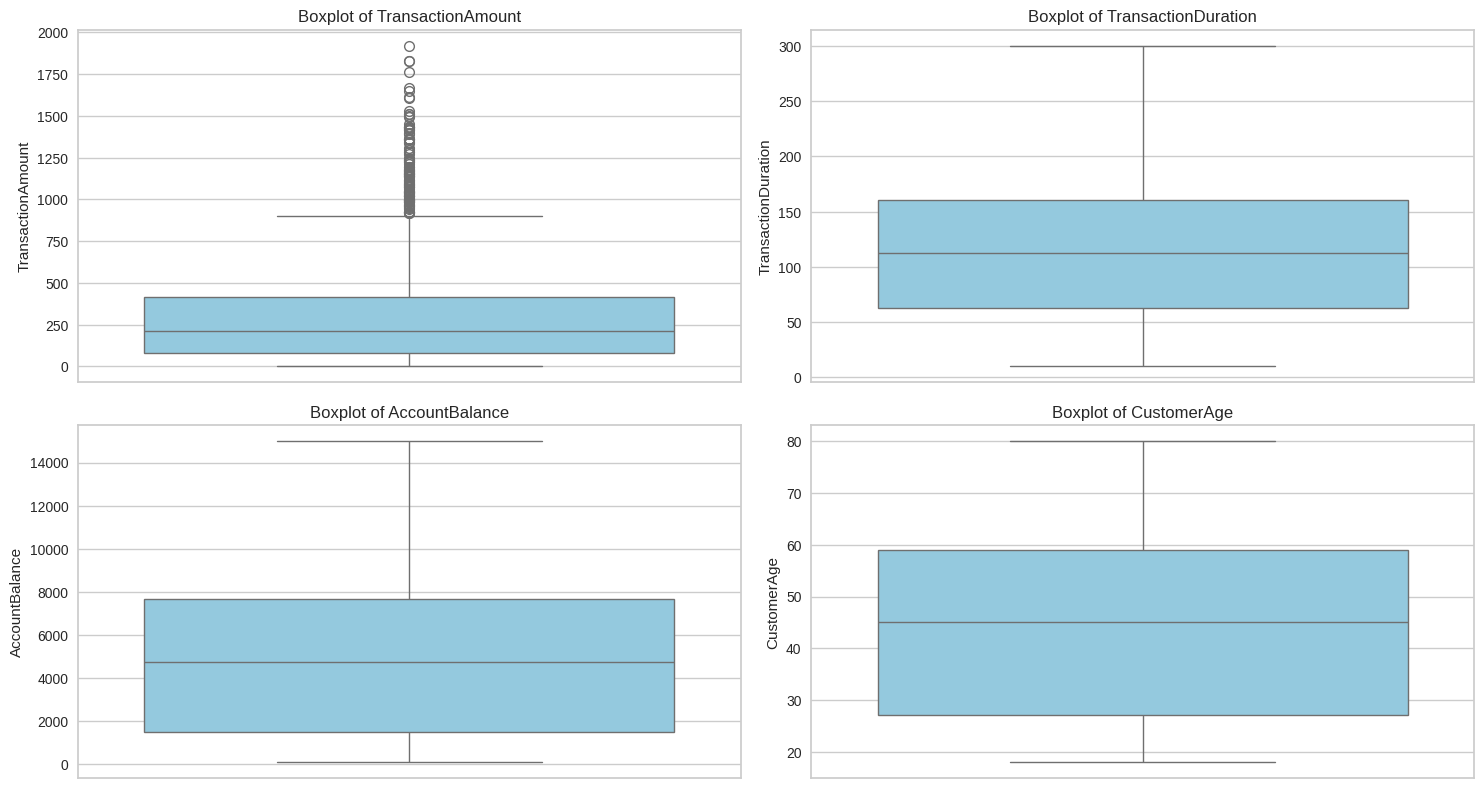

In [15]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

In [16]:
columns_to_check = df_cleaned.select_dtypes(include=['number']).columns

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df_cleaned = remove_outliers(df_cleaned, columns_to_check)

TransactionAmount column: 51 outlier
TransactionDuration column: 0 outlier
AccountBalance column: 0 outlier
CustomerAge column: 0 outlier


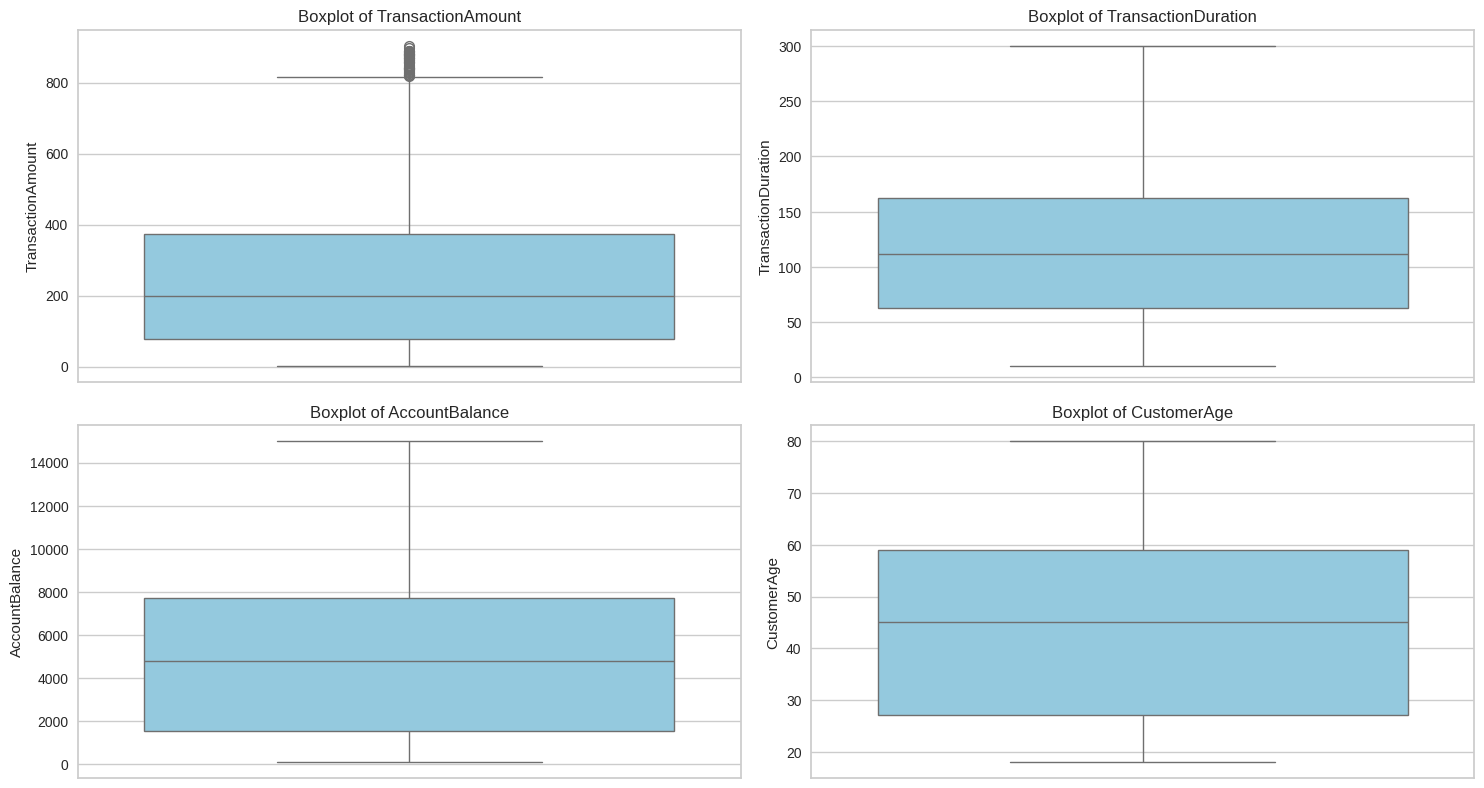

In [17]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

In [18]:
df_cleaned

,TransactionAmount,TransactionType,Channel,TransactionDuration,AccountBalance,CustomerAge
0,14.09,Debit,ATM,81,5112.21,70
1,376.24,Debit,ATM,141,13758.91,68
2,126.29,Debit,Online,56,1122.35,19
3,184.50,Debit,Online,25,8569.06,26
4,13.45,Credit,Online,198,7429.40,26
...,...,...,...,...,...,...
2507,856.21,Credit,Branch,109,12690.79,33
2508,251.54,Debit,Branch,177,254.75,48
2509,28.63,Debit,Branch,146,3382.91,56
2510,185.97,Debit,Online,19,1776.91,23


## Encoding Data Kategorikal

In [19]:
categorical_columns = ['TransactionType', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df_cleaned[categorical_columns])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

## Normalisasi atau Standarisasi Fitur

In [20]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df_cleaned[numerical_columns])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_columns)

In [21]:
df_cleaned = pd.concat([numerical_df, categorical_df], axis=1)
df_cleaned

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online
0,0.015317,0.838710,0.244828,0.336832,0.0,1.0,1.0,0.0,0.0
1,0.416400,0.806452,0.451724,0.918055,0.0,1.0,1.0,0.0,0.0
2,0.139579,0.016129,0.158621,0.068637,0.0,1.0,0.0,0.0,1.0
3,0.204047,0.129032,0.051724,0.569198,0.0,1.0,0.0,0.0,1.0
4,0.014608,0.129032,0.648276,0.492591,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2394,0.947969,0.241935,0.341379,0.846257,1.0,0.0,0.0,1.0,0.0
2395,0.278294,0.483871,0.575862,0.010318,0.0,1.0,0.0,1.0,0.0
2396,0.031420,0.612903,0.468966,0.220590,0.0,1.0,0.0,1.0,0.0
2397,0.205675,0.080645,0.031034,0.112636,0.0,1.0,0.0,0.0,1.0


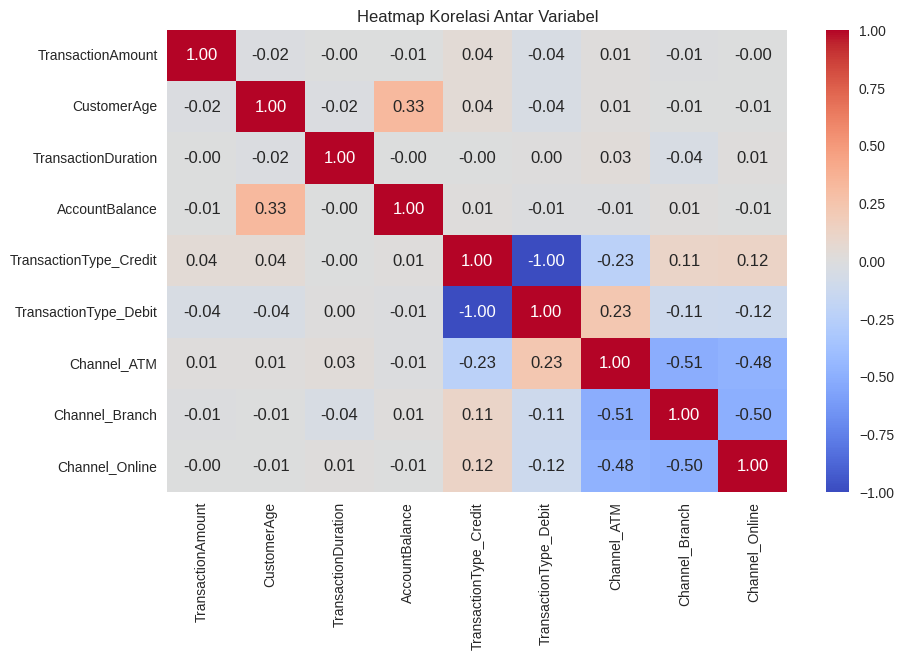

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [23]:
X = df_cleaned.iloc[:, [0, 1, 2, 3, 4, 5]].values
print(pd.DataFrame(X, columns=['TransactionAmount',	'CustomerAge',	'TransactionDuration',	'AccountBalance',	'TransactionType_Credit',	'TransactionType_Debit']))

      TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0              0.015317     0.838710             0.244828        0.336832   
1              0.416400     0.806452             0.451724        0.918055   
2              0.139579     0.016129             0.158621        0.068637   
3              0.204047     0.129032             0.051724        0.569198   
4              0.014608     0.129032             0.648276        0.492591   
...                 ...          ...                  ...             ...   
2394           0.947969     0.241935             0.341379        0.846257   
2395           0.278294     0.483871             0.575862        0.010318   
2396           0.031420     0.612903             0.468966        0.220590   
2397           0.205675     0.080645             0.031034        0.112636   
2398           0.268925     0.096774             0.286207        0.002017   

      TransactionType_Credit  TransactionType_Debit  
0                    

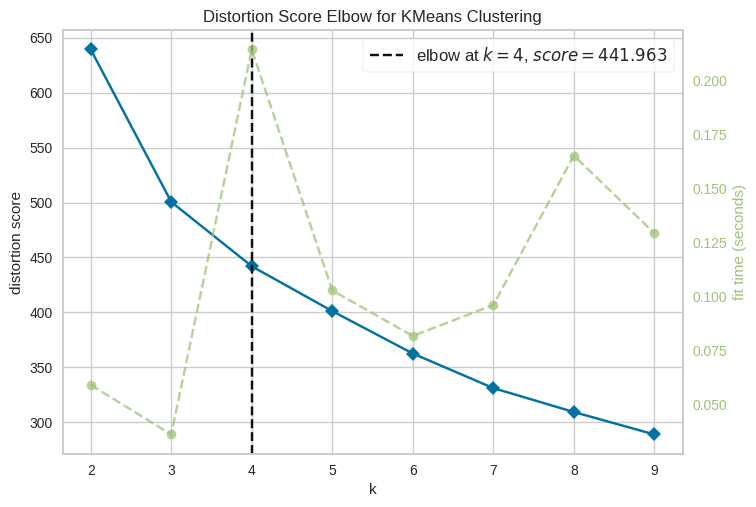

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10))

visualizer.fit(X)

visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [25]:
kmeans_before = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans_before.fit_predict(df_cleaned)

In [26]:
silhouette_avg = silhouette_score(df_cleaned, labels)
print(f'Silhouette Score sebelum feature selection: {silhouette_avg :.2f}')

Silhouette Score sebelum feature selection: 0.49


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [27]:
selector = SelectKBest(mutual_info_classif, k=6)
X = selector.fit_transform(df_cleaned, np.zeros(df_cleaned.shape[0]))

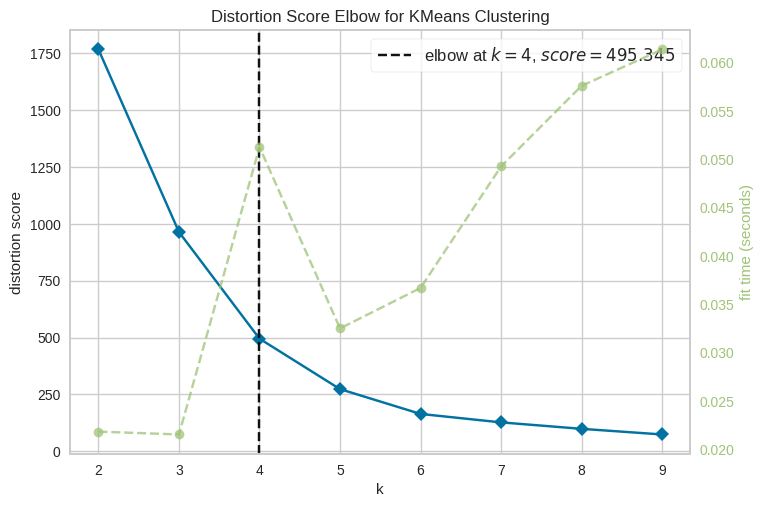

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10))

visualizer.fit(X)

visualizer.show()

In [29]:
kmeans_after = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans_after.fit_predict(X)

In [30]:
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score setelah feature selection: {silhouette_avg :.2f}')

Silhouette Score setelah feature selection: 0.76


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

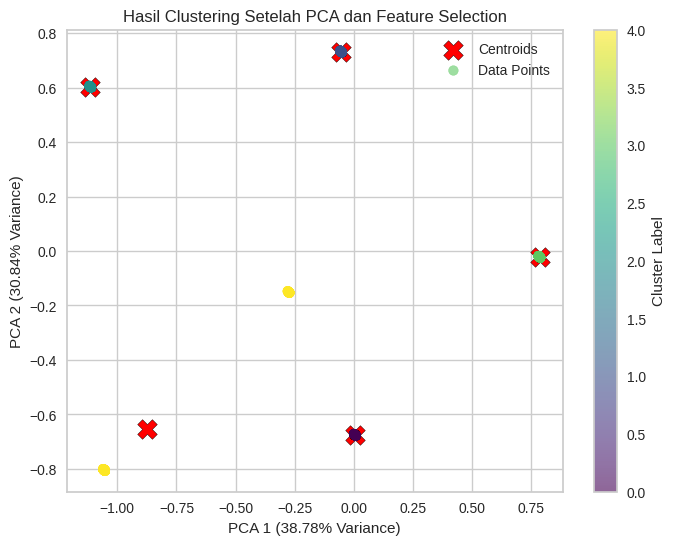

In [31]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, edgecolors='black', label="Centroids")

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label="Data Points")

plt.colorbar(scatter, label="Cluster Label")

plt.xlabel(f'PCA 1 ({explained_variance[0]:.2%} Variance)')
plt.ylabel(f'PCA 2 ({explained_variance[1]:.2%} Variance)')
plt.title('Hasil Clustering Setelah PCA dan Feature Selection')

plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
df_normalized = df_cleaned.copy()

In [33]:
df_normalized['Cluster'] = kmeans_after.labels_

In [34]:
decoded_categories = encoder.inverse_transform(categorical_encoded)
decoded_df = pd.DataFrame(decoded_categories, columns=categorical_columns)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [35]:
original_numerical = scaler.inverse_transform(numerical_scaled)
original_numerical_df = pd.DataFrame(original_numerical, columns=numerical_columns)

In [36]:
df_normalized = pd.concat([decoded_df, original_numerical_df], axis=1)

In [37]:
df_normalized['Cluster'] = kmeans_after.labels_

In [38]:
df_normalized['CustomerAge'] = df_normalized['CustomerAge'].astype(int)

In [39]:
df_normalized

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
0,Debit,ATM,14.09,70,81.0,5112.21,3
1,Debit,ATM,376.24,68,141.0,13758.91,3
2,Debit,Online,126.29,19,56.0,1122.35,0
3,Debit,Online,184.50,26,25.0,8569.06,0
4,Credit,Online,13.45,26,198.0,7429.40,4
...,...,...,...,...,...,...,...
2394,Credit,Branch,856.21,33,109.0,12690.79,2
2395,Debit,Branch,251.54,48,177.0,254.75,1
2396,Debit,Branch,28.63,56,146.0,3382.91,1
2397,Debit,Online,185.97,23,19.0,1776.91,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [40]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='number').columns].mean().astype({'CustomerAge': 'int', 'Cluster': 'int'})

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
Cluster,,,,,
0,255.681815,43,119.966667,4883.642296,0
1,238.480304,43,115.856419,5292.817669,1
2,286.736708,46,114.753086,5029.695103,2
3,256.395403,45,122.356944,5133.808722,3
4,259.149836,45,123.197368,5401.191678,4


In [41]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='object').columns].value_counts()

Cluster  TransactionType  Channel
0        Debit            Online     540
1        Debit            Branch     592
2        Credit           Branch     243
3        Debit            ATM        720
4        Credit           Online     233
                          ATM         71
Name: count, dtype: int64

In [42]:
df_normalized.groupby('Cluster').agg(lambda x: x.mode()[0])

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
Cluster,,,,,,
0,Debit,Online,16.73,28,68.0,101.25
1,Debit,Branch,28.38,27,63.0,117.98
2,Credit,Branch,3.30,28,44.0,105.01
3,Debit,ATM,29.22,27,88.0,112.76
4,Credit,Online,425.18,26,137.0,125.85


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  - Lebih banyak menggunakan Online dengan menggunakan transaksi Debit.
  - Kebanyakan berumur 43 dengan jumlah transaksi 255.681815.
  - Durasi traksaksi paling sering muncul adalah 68 detik.
2. Cluster 1:
  - Lebih suka transaksi langsung di bank untuk penggunaan kartu Debit.
  - Kebanyakan berumur 43 dengan jumlah transaksi 238.480304.
  - Durasi traksaksi paling sering muncul adalah 63 detik.
3. Cluster 2:
  - Lebih suka transaksi langsung di bank untuk penggunaan kartu Kredit.
  - Kebanyakan berumur 46 dengan jumlah transaksi 286.736708.
  - Durasi traksaksi paling sering muncul adalah 44 detik.
4. Cluster 3:
   - Lebih tertarik tarik tunia atau transaksi langsung di mesin ATM daripada Online.
   - Kebanyakan berumur 45 dengan jumlah transaksi 256.395403.
   - Durasi traksaksi paling sering muncul adalah 88 detik.
5. Cluster 4:
  - Lebih banyak menggunakan Online dengan menggunakan transaksi Credit.
  - Kebanyakan berumur 45 dengan jumlah transaksi 259.149836.
  - Durasi traksaksi paling sering muncul adalah 137 detik.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata TransactionAmount:** 255.681815
- **Rata-rata CustomerAge:** 43 tahun
- **Rata-rata TransactionDuration:** 119.966667
- **Rata-rata AccountBalance:** 4883.642296
- **Modus TransactionType:** Debit
- **Modus Channel:** Online
- **Analisis:** Pelanggan dalam kelompok ini lebih nyaman melakukan transaksi online dengan kartu debit. Mereka mungkin sering menggunakan e-commerce atau pembayaran digital.

## Cluster 1:
- **Rata-rata TransactionAmount:** 238.480304
- **Rata-rata CustomerAge:** 43 tahun
- **Rata-rata TransactionDuration:** 115.856419
- **Rata-rata AccountBalance:** 5292.817669
- **Modus TransactionType:** Debit
- **Modus Channel:** Branch
- **Analisis:** Kelompok ini lebih memilih layanan langsung di bank, mungkin karena kurang percaya dengan transaksi online atau butuh bantuan dari petugas bank.

## Cluster 2:
- **Rata-rata TransactionAmount:** 286.736708
- **Rata-rata CustomerAge:** 46 tahun
- **Rata-rata TransactionDuration:** 114.753086
- **Rata-rata AccountBalance:** 5029.695103
- **Modus TransactionType:** Credit
- **Modus Channel:** Branch
- **Analisis:** Kelompok ini lebih suka datang ke bank untuk menggunakan kartu kredit. Kemungkinan mereka lebih nyaman dengan layanan tatap muka atau memerlukan transaksi yang memerlukan otorisasi langsung.

## Cluster 3:
- **Rata-rata TransactionAmount:** 256.395403
- **Rata-rata CustomerAge:** 45 tahun
- **Rata-rata TransactionDuration:** 122.356944
- **Rata-rata AccountBalance:** 5133.808722
- **Modus TransactionType:** Debit
- **Modus Channel:** ATM
- **Analisis:** Kelompok ini lebih suka menggunakan ATM daripada transaksi online atau ke cabang bank. Mereka masih mengandalkan uang tunai dan transfer manual.

## Cluster 4:
- **Rata-rata TransactionAmount:** 259.149836
- **Rata-rata CustomerAge:** 45 tahun
- **Rata-rata TransactionDuration:** 123.197368
- **Rata-rata AccountBalance:** 5401.191678
- **Modus TransactionType:** Credit
- **Modus Channel:** Online
- **Analisis:** Kelompok ini adalah pengguna aktif kartu kredit untuk transaksi online. Mereka kemungkinan memiliki daya beli tinggi dan sering berbelanja online.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
df_normalized.to_csv('dataset_clustering.csv', index=False)